## Prepare

In [12]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

ccb = pd.read_feather('../data/input/credit_card_balance.feather')
prv = pd.read_feather('../data/input/previous_application.feather')
app_trn = pd.read_feather('../data/input/application_train.feather')


## weighted average

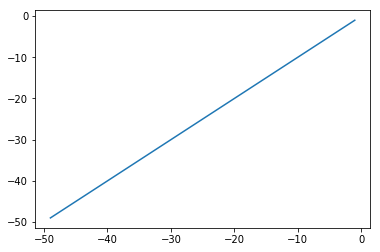

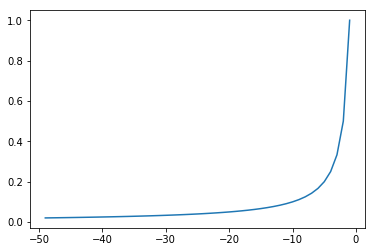

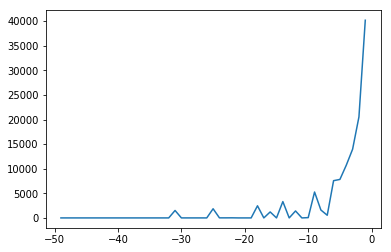

Normal Average 10953.362755102042
Weighted Average(w=1/MONTHS_BALANCE) 26802.88690875492


In [13]:
grouped = ccb.groupby('SK_ID_PREV')
sk_id_prev = ccb.SK_ID_PREV.unique()[20]
selected_ccb = grouped.get_group(sk_id_prev)
selected_ccb = selected_ccb.sort_values('MONTHS_BALANCE', ascending=True).reset_index(drop=True)
weight = -1 / selected_ccb.MONTHS_BALANCE

wavg_amt_balance = np.average(selected_ccb.AMT_BALANCE, weights=weight)
plt.plot(selected_ccb.MONTHS_BALANCE, selected_ccb.MONTHS_BALANCE)
plt.show()
plt.plot(selected_ccb.MONTHS_BALANCE, weight)
plt.show()
plt.plot(selected_ccb.MONTHS_BALANCE, selected_ccb.AMT_BALANCE * weight)
plt.show()
print("Normal Average", np.average(selected_ccb.AMT_BALANCE))
print("Weighted Average(w=1/MONTHS_BALANCE)", wavg_amt_balance)


In [14]:
group = ccb.iloc[0:1000][['SK_ID_CURR', 'SK_ID_PREV', 'AMT_BALANCE']].groupby('SK_ID_PREV')

In [15]:
group.apply(lambda x: np.average(x['AMT_BALANCE'], weights=-1 / ccb.loc[x.index, 'MONTHS_BALANCE'], axis=0))

SK_ID_PREV
1000355    155068.695
1000989         0.000
1002015    133277.895
1003474       130.500
1004900    463685.040
1005486         0.000
1007369         0.000
1008119    225575.280
1008598    107779.545
1008708         0.000
1009803    135326.115
1009822         0.000
1010548         0.000
1011095    375190.335
1012912     59283.900
1020798         0.000
1029146    464989.680
1029521         0.000
1032912     11287.800
1033569    196111.170
1037340    380620.710
1039039         0.000
1051692         0.000
1052570    382761.540
1053765     71786.880
1054642         0.000
1054686    235839.825
1055022    156841.245
1056137    109688.985
1056268    284973.975
1056548         0.000
1059035    432016.740
1060352    539799.750
1060526    418353.075
1062011         0.000
1063072    221215.815
1064892    194679.900
1065408    173949.750
1068722     83612.160
1077796    260082.135
1078479         0.000
1079071    353451.645
1079749         0.000
1081753         0.000
1081926         0.000

In [16]:
from multiprocessing import Pool, cpu_count


def ccb_wavg(x): return np.average(x, weights=-1/ccb.loc[x.index, 'MONTHS_BALANCE'], axis=0)


def wrapper_ccb_wavg(g): return g.apply(ccb_wavg)

def mprocess(grouped, cols, num_processes=4):
    with Pool(num_processes) as pool:
        ret_list = pool.map(wrapper_ccb_wavg, [grouped[col] for col in cols])
    return pd.concat(ret_list, axis=1)



In [17]:
ccb_wavg_cols = ["AMT_BALANCE",
                 "AMT_CREDIT_LIMIT_ACTUAL",
                 "AMT_DRAWINGS_ATM_CURRENT",
                 "AMT_DRAWINGS_CURRENT",
                 "AMT_DRAWINGS_OTHER_CURRENT",
                 "AMT_DRAWINGS_POS_CURRENT",
                 "AMT_INST_MIN_REGULARITY",
                 "AMT_PAYMENT_CURRENT",
                 "AMT_PAYMENT_TOTAL_CURRENT",
                 "AMT_RECEIVABLE_PRINCIPAL",
                 "AMT_RECIVABLE",
                 "AMT_TOTAL_RECEIVABLE",
                 "CNT_DRAWINGS_ATM_CURRENT",
                 "CNT_DRAWINGS_CURRENT",
                 "CNT_DRAWINGS_OTHER_CURRENT",
                 "CNT_DRAWINGS_POS_CURRENT",
                 "CNT_INSTALMENT_MATURE_CUM"]

In [18]:
grouped = ccb.iloc[0:10000][['SK_ID_PREV', 'SK_ID_CURR'] + ccb_wavg_cols].groupby('SK_ID_PREV')
ret = mprocess(grouped, ccb_wavg_cols)
ret.columns = ["CCB_WAVG_" + _c for _c in ret.columns]


,CCB_WAVG_AMT_BALANCE,CCB_WAVG_AMT_CREDIT_LIMIT_ACTUAL,CCB_WAVG_AMT_DRAWINGS_ATM_CURRENT,CCB_WAVG_AMT_DRAWINGS_CURRENT,CCB_WAVG_AMT_DRAWINGS_OTHER_CURRENT,CCB_WAVG_AMT_DRAWINGS_POS_CURRENT,CCB_WAVG_AMT_INST_MIN_REGULARITY,CCB_WAVG_AMT_PAYMENT_CURRENT,CCB_WAVG_AMT_PAYMENT_TOTAL_CURRENT,CCB_WAVG_AMT_RECEIVABLE_PRINCIPAL,CCB_WAVG_AMT_RECIVABLE,CCB_WAVG_AMT_TOTAL_RECEIVABLE,CCB_WAVG_CNT_DRAWINGS_ATM_CURRENT,CCB_WAVG_CNT_DRAWINGS_CURRENT,CCB_WAVG_CNT_DRAWINGS_OTHER_CURRENT,CCB_WAVG_CNT_DRAWINGS_POS_CURRENT,CCB_WAVG_CNT_INSTALMENT_MATURE_CUM
SK_ID_PREV,,,,,,,,,,,,,,,,,
1000094,0.000000,67500.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.035000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,48.000000
1000344,151668.360000,180000.000000,0.000000,0.000000,0.0,0.000000,9000.000000,9000.000000,9000.000000,146573.730000,151668.360000,151668.360000,0.000000,0.000000,0.0,0.000000,16.000000
1000355,155068.695000,135000.000000,2250.000000,2250.000000,0.0,0.000000,7680.825000,8100.000000,8100.000000,134619.300000,151808.445000,151808.445000,1.000000,1.000000,0.0,0.000000,6.000000
1000431,67.500000,112500.000000,0.000000,0.000000,0.0,0.000000,296.415000,890.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,30.000000
1000514,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,313.785000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,22.000000
1000840,66529.530000,67500.000000,0.000000,0.000000,0.0,0.000000,3375.000000,4500.000000,4500.000000,64434.150000,66529.530000,66529.530000,0.000000,0.000000,0.0,0.000000,1.000000
1000847,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,235.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,9.000000
1000848,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,201.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
1000865,0.000000,112500.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN


In [ ]:
ret = ret.merge(prv, how='left', on='SK_ID_PREV')

In [ ]:
re

In [30]:
sk_id_curr = grouped.apply(lambda x: x.SK_ID_CURR.head(1))
sk_id_curr.reset_index()

,SK_ID_PREV,level_1,SK_ID_CURR
0,1000094,7061,359175
1,1000344,9946,377673
2,1000355,85,274118
3,1000431,5539,128665
4,1000514,7179,126099
5,1000840,7632,120761
6,1000847,3830,389124
7,1000848,4419,430179
8,1000865,9715,407962
9,1000907,6138,264055
